In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Simplified 2D example (real embeddings have hundreds of dimensions)
word_embeddings = {
    "cat": [0.8, 0.6],
    "kitten": [0.75, 0.65],
    "dog": [0.7, 0.3],
    "puppy": [0.65, 0.35],
    "car": [-0.5, 0.2],
    "truck": [-0.45, 0.15]
}

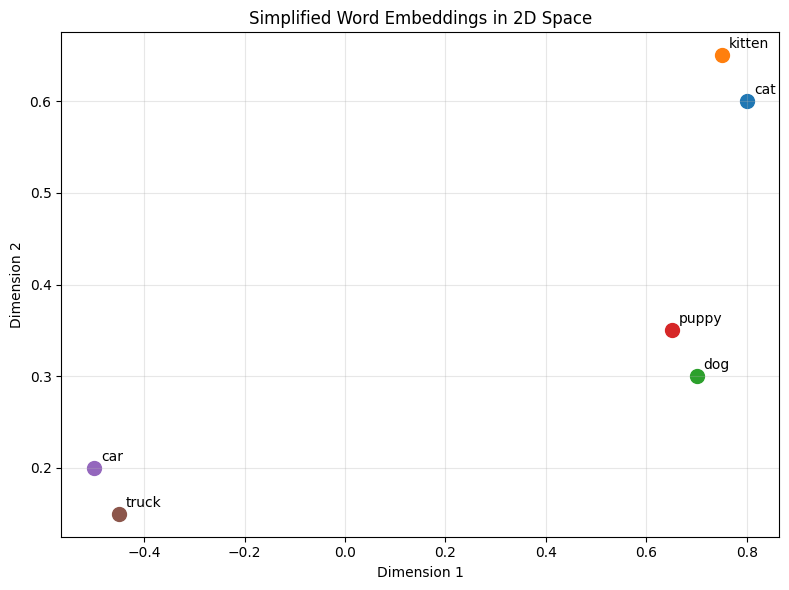

In [5]:
fig, ax = plt.subplots(figsize=(8, 6))

for word, coords in word_embeddings.items():
    ax.scatter(coords[0], coords[1], s=100)
    ax.annotate(word, (coords[0], coords[1]), xytext=(5, 5), 
                textcoords='offset points')

ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_title('Simplified Word Embeddings in 2D Space')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Measuring Similarity

In [8]:
def cosine_similarity(vec1,vec2):
    """ Cosine Similarity measures the angle between two vectors.
    - Result close to 1 : very similar
    - Result close to 0 : not related
    - Result close to -1 : Opposite meanings
    """
    dot_product = np.dot(vec1,vec2)
    norm_a =np.linalg.norm(vec1)
    norm_b =np.linalg.norm(vec2)
    return dot_product/(norm_a * norm_b)


In [10]:
# Example
cat_vector = [0.8, 0.6, 0.3]
kitten_vector = [0.75, 0.65,0.35]
car = [-0.5, 0.2, 0.1]
    #"dog": [0.7, 0.3],
    #"puppy": [0.65, 0.35],
    
cat_kitten_similarity = cosine_similarity(cat_vector,kitten_vector)
print(cat_kitten_similarity)

0.9966186334192181


### Creating my first Hugging Face embeddings

In [11]:
from langchain_huggingface import HuggingFaceEmbeddings

## Initialize a simple Embedding model(No api key needed)

embeddings = HuggingFaceEmbeddings(
    model_name = "sentence-transformers/all-MiniLM-L6-v2"

)

embeddings

/Users/jamadagnikotamsetty/MyCode/RAG_Pipelines/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


HuggingFaceEmbeddings(model_name='sentence-transformers/all-MiniLM-L6-v2', cache_folder=None, model_kwargs={}, encode_kwargs={}, query_encode_kwargs={}, multi_process=False, show_progress=False)

In [12]:
## Create your first embeddings
text = "Hello I am learning about embedding"

embedding = embeddings.embed_query(text)
print(f"Text : {text}")
print(f"Embedding Lenght : {len(embedding)}")
print(embedding)

Text : Hello I am learning about embedding
Embedding Lenght : 384
[-0.0016409012023359537, -0.07472780346870422, -0.011413262225687504, -0.008305101655423641, 0.024603627622127533, 0.07469876110553741, 0.015992917120456696, 0.01873486302793026, 0.048401907086372375, -0.02437940426170826, 0.023542048409581184, 0.06919597834348679, 0.048959650099277496, -0.005005443003028631, -0.06334783136844635, 0.017487160861492157, 0.05594440922141075, 0.058678124099969864, -0.08954068273305893, -0.029820073395967484, -0.023854132741689682, -0.05732787027955055, -0.003607723629102111, -0.10292918235063553, 0.006382999941706657, -0.017305888235569, -0.00862829852849245, 0.06156689301133156, 0.1126990094780922, -0.06540338695049286, 0.05875179171562195, -0.05331350117921829, 0.003291715169325471, 0.05354053154587746, -0.08992418646812439, 0.10551506280899048, 0.032538317143917084, -0.018465543165802956, -0.07809525728225708, -0.0073561775498092175, 0.01225627213716507, 0.008080259896814823, -0.02669543

In [19]:
sentences = [
     "The cat sat on the mat",
    "The cat sat on the mat",
    "The dog played in the yard",
    "I love programming in Python",
    "Python is my favorite programming language"
]

embedding_sentences = embeddings.embed_documents(sentences)
print(f"Text : {sentences}")
print(f"Embedding length : {len(embedding)}")
print(embedding_sentences)
print(embedding_sentences[0])
print(embedding_sentences[1])

Text : ['The cat sat on the mat', 'The cat sat on the mat', 'The dog played in the yard', 'I love programming in Python', 'Python is my favorite programming language']
Embedding length : 5
[[0.1304018348455429, -0.011870156042277813, -0.028116997331380844, 0.051238544285297394, -0.055974505841732025, 0.03019152767956257, 0.030161302536725998, 0.024698294699192047, -0.01837053894996643, 0.05876684561371803, -0.024953141808509827, 0.06015419960021973, 0.03983170911669731, 0.033230509608983994, -0.06131141632795334, -0.04937310889363289, -0.05486347898840904, -0.04007610306143761, 0.05642913281917572, 0.039156604558229446, -0.03473712131381035, -0.013247719034552574, 0.03196623548865318, -0.06349916756153107, -0.06017857789993286, 0.07823452353477478, -0.028303835541009903, -0.047442808747291565, 0.040359318256378174, -0.0066309357061982155, -0.0667409673333168, -0.004191323649138212, -0.02531169168651104, 0.05334161967039108, 0.017428051680326462, -0.0979236364364624, 0.00606126338243484

In [20]:
from langchain_huggingface import HuggingFaceEmbeddings
import time

# Popular models comparison
models = {
    "all-MiniLM-L6-v2": {
        "size": 384,
        "description": "Fast and efficient, good quality",
        "use_case": "General purpose, real-time applications"
    },
    "all-mpnet-base-v2": {
        "size": 768,
        "description": "Best quality, slower than MiniLM",
        "use_case": "When quality matters more than speed"
    },
    "all-MiniLM-L12-v2": {
        "size": 384,
        "description": "Slightly better than L6, bit slower",
        "use_case": "Good balance of speed and quality"
    },
    "multi-qa-MiniLM-L6-cos-v1": {
        "size": 384,
        "description": "Optimized for question-answering",
        "use_case": "Q&A systems, semantic search"
    },
    "paraphrase-multilingual-MiniLM-L12-v2": {
        "size": 384,
        "description": "Supports 50+ languages",
        "use_case": "Multilingual applications"
    }
}

print("📊 Popular Open Source Embedding Models:\n")
for model_name, info in models.items():
    print(f"Model: sentence-transformers/{model_name}")
    print(f"  📏 Embedding size: {info['size']} dimensions")
    print(f"  📝 Description: {info['description']}")
    print(f"  🎯 Use case: {info['use_case']}\n")


📊 Popular Open Source Embedding Models:

Model: sentence-transformers/all-MiniLM-L6-v2
  📏 Embedding size: 384 dimensions
  📝 Description: Fast and efficient, good quality
  🎯 Use case: General purpose, real-time applications

Model: sentence-transformers/all-mpnet-base-v2
  📏 Embedding size: 768 dimensions
  📝 Description: Best quality, slower than MiniLM
  🎯 Use case: When quality matters more than speed

Model: sentence-transformers/all-MiniLM-L12-v2
  📏 Embedding size: 384 dimensions
  📝 Description: Slightly better than L6, bit slower
  🎯 Use case: Good balance of speed and quality

Model: sentence-transformers/multi-qa-MiniLM-L6-cos-v1
  📏 Embedding size: 384 dimensions
  📝 Description: Optimized for question-answering
  🎯 Use case: Q&A systems, semantic search

Model: sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2
  📏 Embedding size: 384 dimensions
  📝 Description: Supports 50+ languages
  🎯 Use case: Multilingual applications

